In [1]:
import readability
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a dataframe with all stories and their generations

all_stories = json.load(open('../books/real_processed.json'))
modern_stories = json.load(open('../books/modern_processed.json'))
modern_stories = pd.DataFrame(modern_stories)
all_stories_opt = pd.DataFrame(all_stories)
all_stories_llama = pd.DataFrame(all_stories)
all_stories_alpaca = pd.DataFrame(all_stories)

# Load OPT stories
gen_stories = json.load(open('../books/from_server/gen_stories_opt.json'))
gen_stories = pd.DataFrame(gen_stories)
all_stories_opt = all_stories_opt.merge(gen_stories, on=['id'], how='left')

# Load LLaMA stories
gen_stories = json.load(open('../books/from_server/gen_stories_llama.json'))
gen_stories = pd.DataFrame(gen_stories)
all_stories_llama = all_stories_llama.merge(gen_stories, on=['id'], how='left')

# Load Alpaca stories
gen_stories = json.load(open('../books/from_server/gen_stories_alpaca.json'))
gen_stories = pd.DataFrame(gen_stories)
all_stories_alpaca = all_stories_alpaca.merge(gen_stories, on=['id'], how='left')
free_stories_alpaca = gen_stories.loc[gen_stories.gen_id.isnull()].copy()

original_stories = list(set(all_stories_opt.text.to_list()))
modern_stories = list(set(modern_stories.text.to_list()))

all_stories_opt['story_score'] = 0
all_stories_opt['gen_story_score'] = 0

all_stories_llama['story_score'] = 0
all_stories_llama['gen_story_score'] = 0

all_stories_alpaca['story_score'] = 0
all_stories_alpaca['gen_story_score'] = 0
free_stories_alpaca['gen_story_score'] = 0

In [3]:
for i, story in all_stories_opt.iterrows():
    s = story['text']
    s_gen = story['gen_text']
    all_stories_opt.loc[i,'story_score'] = readability.getmeasures(s, lang='en')['readability grades']['FleschReadingEase']
    all_stories_opt.loc[i,'gen_story_score'] = readability.getmeasures(s_gen, lang='en')['readability grades']['FleschReadingEase']

for i, story in all_stories_llama.iterrows():
    s = story['text']
    s_gen = story['gen_text']
    all_stories_llama.loc[i,'story_score'] = readability.getmeasures(s, lang='en')['readability grades']['FleschReadingEase']
    all_stories_llama.loc[i,'gen_story_score'] = readability.getmeasures(s_gen, lang='en')['readability grades']['FleschReadingEase']

for i, story in all_stories_alpaca.iterrows():
    s = story['text']
    s_gen = story['gen_text']
    all_stories_alpaca.loc[i,'story_score'] = readability.getmeasures(s, lang='en')['readability grades']['FleschReadingEase']
    all_stories_alpaca.loc[i,'gen_story_score'] = readability.getmeasures(s_gen, lang='en')['readability grades']['FleschReadingEase']

for i, story in free_stories_alpaca.iterrows():
    s_gen = story['gen_text']
    free_stories_alpaca.loc[i,'gen_story_score'] = readability.getmeasures(s_gen, lang='en')['readability grades']['FleschReadingEase']

In [4]:
original_stories_score = []
modern_stories_score = []

for s in original_stories:
    original_stories_score.append(readability.getmeasures(s, lang='en')['readability grades']['FleschReadingEase'])

modern_stories_score = []

for s in modern_stories:
    modern_stories_score.append(readability.getmeasures(s, lang='en')['readability grades']['FleschReadingEase'])

In [5]:
opt_first_line_scores = all_stories_opt[all_stories_opt.p_length == 'first_line']['gen_story_score'].values
opt_first_256_tokens_scores = all_stories_opt[all_stories_opt.p_length == '256_tokens']['gen_story_score'].values
opt_first_512_tokens_scores = all_stories_opt[all_stories_opt.p_length == '512_tokens']['gen_story_score'].values

llama_first_line_scores = all_stories_llama[all_stories_llama.p_length == 'first_line']['gen_story_score'].values
llama_first_256_tokens_scores = all_stories_llama[all_stories_llama.p_length == '256_tokens']['gen_story_score'].values
llama_first_512_tokens_scores = all_stories_llama[all_stories_llama.p_length == '512_tokens']['gen_story_score'].values

alpaca_t_1_scores = all_stories_alpaca[all_stories_alpaca.t_type == 1]['gen_story_score'].values
alpaca_t_3_scores = all_stories_alpaca[all_stories_alpaca.t_type == 3]['gen_story_score'].values

alpaca_free_t_2_scores = free_stories_alpaca[free_stories_alpaca.t_type == 2]['gen_story_score'].values
alpaca_free_t_4_scores = free_stories_alpaca[free_stories_alpaca.t_type == 4]['gen_story_score'].values

In [6]:
def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)

In [7]:
opt_first_line_false_scores = [x for x in opt_first_line_scores if x < 0 or x > 100 ]
opt_first_256_tokens_false_scores = [x for x in opt_first_256_tokens_scores if x < 0 or x > 100 ]
opt_first_512_tokens_false_scores = [x for x in opt_first_512_tokens_scores if x < 0 or x > 100 ]
llama_first_line_false_scores = [x for x in llama_first_line_scores if x< 0 or x > 100 ]
llama_first_256_tokens_false_scores = [x for x in llama_first_256_tokens_scores if x < 0 or x > 100 ]
llama_first_512_tokens_false_scores = [x for x in llama_first_512_tokens_scores if x < 0 or x > 100 ]

In [37]:
print(len([x for x in original_stories_score if x<0 or x>100]))
print(len([x for x in modern_stories_score if x<0 or x>100]))

17
2


In [9]:
print(len(opt_first_line_scores))
print(len(opt_first_256_tokens_scores))
print(len(opt_first_512_tokens_scores))
print(len(llama_first_line_scores))
print(len(llama_first_256_tokens_scores))
print(len(llama_first_512_tokens_scores))

610
610
610
610
610
610


In [10]:
print(len(opt_first_line_false_scores))
print(len(opt_first_256_tokens_false_scores))
print(len(opt_first_512_tokens_false_scores))
print(len(llama_first_line_false_scores))
print(len(llama_first_256_tokens_false_scores))
print(len(llama_first_512_tokens_false_scores))

134
128
108
137
106
110


In [11]:
alpaca_t_1_false_scores = [x for x in alpaca_t_1_scores if x < 0 or x > 100 ]
alpaca_t_3_false_scores = [x for x in alpaca_t_3_scores if x < 0 or x > 100 ]

alpaca_free_t_2_false_scores = [x for x in alpaca_free_t_2_scores if x < 0 or x > 100 ]
alpaca_free_t_4_false_scores = [x for x in alpaca_free_t_4_scores if x < 0 or x > 100 ]


In [12]:
print(len(alpaca_t_1_scores))
print(len(alpaca_t_3_scores))
print(len(alpaca_free_t_2_scores))
print(len(alpaca_free_t_4_scores))

610
610
610
610


In [13]:
print(len(alpaca_t_1_false_scores))
print(len(alpaca_t_3_false_scores))
print(len(alpaca_free_t_2_false_scores))
print(len(alpaca_free_t_4_false_scores))

0
0
0
0


In [21]:
def preprocess_for_plot(d):
    return [x for x in d if x <= 100 and x >=0]

/var/folders/hm/fpq61bcd7vvgs4q8dtq8qn6m0000gp/T/ipykernel_39840/1103420723.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(['OPT: First Line','OPT: First 256 Tokens','OPT: First 512 Tokens'])


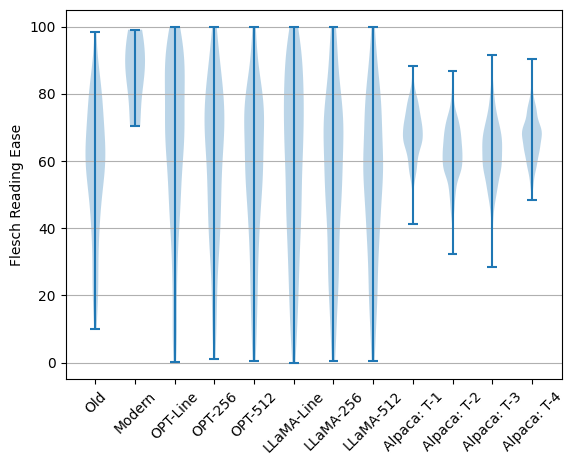

In [26]:
fig, axes = plt.subplots()

p = axes.violinplot(
    dataset = [
        preprocess_for_plot(original_stories_score),
        preprocess_for_plot(modern_stories_score),
        preprocess_for_plot(opt_first_line_scores),
        preprocess_for_plot(opt_first_256_tokens_scores),
        preprocess_for_plot(opt_first_512_tokens_scores),
        preprocess_for_plot(llama_first_line_scores),
        preprocess_for_plot(llama_first_256_tokens_scores),
        preprocess_for_plot(llama_first_512_tokens_scores),
        preprocess_for_plot(alpaca_t_1_scores),
        preprocess_for_plot(alpaca_free_t_2_scores),
        preprocess_for_plot(alpaca_t_3_scores),
        preprocess_for_plot(alpaca_free_t_4_scores)
    ] 
)
axes.yaxis.grid(True)
axes.set_ylabel('Flesch Reading Ease')
axes.set_xticklabels(['OPT: First Line','OPT: First 256 Tokens','OPT: First 512 Tokens'])
labels = [
    'Old',
    'Modern',
    'OPT-Line',
    'OPT-256',
    'OPT-512',
    'LLaMA-Line',
    'LLaMA-256',
    'LLaMA-512',
    'Alpaca: T-1',
    'Alpaca: T-2',
    'Alpaca: T-3',
    'Alpaca: T-4',
]
set_axis_style(axes, labels)
plt.xticks(rotation = 45)
plt.show()

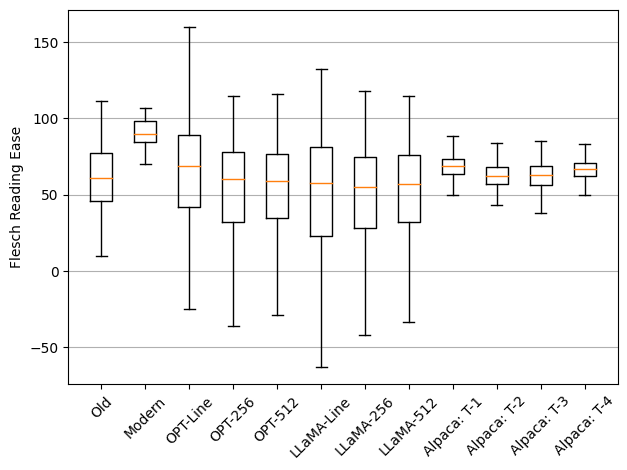

In [41]:
fig, axes = plt.subplots()

p = axes.boxplot(
    [
        original_stories_score,
        modern_stories_score,
        opt_first_line_scores,
        opt_first_256_tokens_scores,
        opt_first_512_tokens_scores,
        llama_first_line_scores,
        llama_first_256_tokens_scores,
        llama_first_512_tokens_scores,
        alpaca_t_1_scores,
        alpaca_free_t_2_scores,
        alpaca_t_3_scores,
        alpaca_free_t_4_scores,
    ], 
    showfliers=False
)

axes.yaxis.grid(True)
# axes.set_xlabel('Scenario')
axes.set_ylabel('Flesch Reading Ease')
# axes.set_xticklabels(['OPT: First Line','OPT: First 256 Tokens','OPT: First 512 Tokens'])
labels = [
    'Old',
    'Modern',
    'OPT-Line',
    'OPT-256',
    'OPT-512',
    'LLaMA-Line',
    'LLaMA-256',
    'LLaMA-512',
    'Alpaca: T-1',
    'Alpaca: T-2',
    'Alpaca: T-3',
    'Alpaca: T-4',
]
set_axis_style(axes, labels)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("plots/r_score.png", dpi=300)
# plt.show()

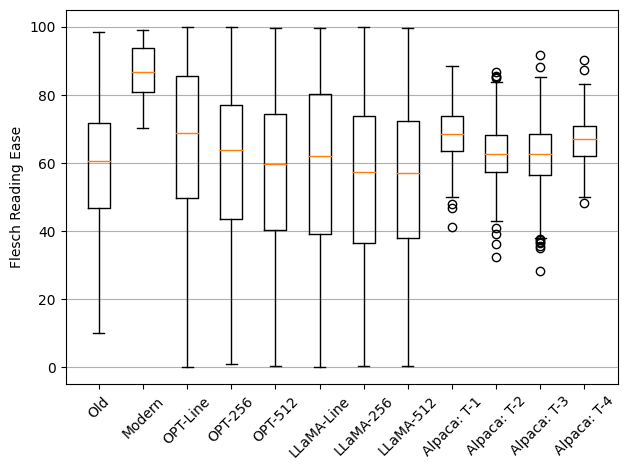

In [42]:
fig, axes = plt.subplots()

p = axes.boxplot(
    [
        preprocess_for_plot(original_stories_score),
        preprocess_for_plot(modern_stories_score),
        preprocess_for_plot(opt_first_line_scores),
        preprocess_for_plot(opt_first_256_tokens_scores),
        preprocess_for_plot(opt_first_512_tokens_scores),
        preprocess_for_plot(llama_first_line_scores),
        preprocess_for_plot(llama_first_256_tokens_scores),
        preprocess_for_plot(llama_first_512_tokens_scores),
        preprocess_for_plot(alpaca_t_1_scores),
        preprocess_for_plot(alpaca_free_t_2_scores),
        preprocess_for_plot(alpaca_t_3_scores),
        preprocess_for_plot(alpaca_free_t_4_scores)
    ] 
)

axes.yaxis.grid(True)
# axes.set_xlabel('Scenario')
axes.set_ylabel('Flesch Reading Ease')
# axes.set_xticklabels(['OPT: First Line','OPT: First 256 Tokens','OPT: First 512 Tokens'])
labels = [
    'Old',
    'Modern',
    'OPT-Line',
    'OPT-256',
    'OPT-512',
    'LLaMA-Line',
    'LLaMA-256',
    'LLaMA-512',
    'Alpaca: T-1',
    'Alpaca: T-2',
    'Alpaca: T-3',
    'Alpaca: T-4',
]
set_axis_style(axes, labels)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("plots/r_score_range.png", dpi=300)
# plt.show()